<a href="https://colab.research.google.com/github/Baldros/NLP-Course-HuggingFace-/blob/main/1_TransformerModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução:

    Este curso foi projetado para ensinar tudo sobre o ecossistema da Hugging Face: como usar o conjunto
    de dados e o hub de modelos, bem como todas as nossas bibliotecas de código aberto. Aqui está a Tabela
    de Conteúdos. Como você pode ver, está dividido em três seções que se tornam   mais avançadas. Neste
    momento, as duas primeiras seções foram lançadas:

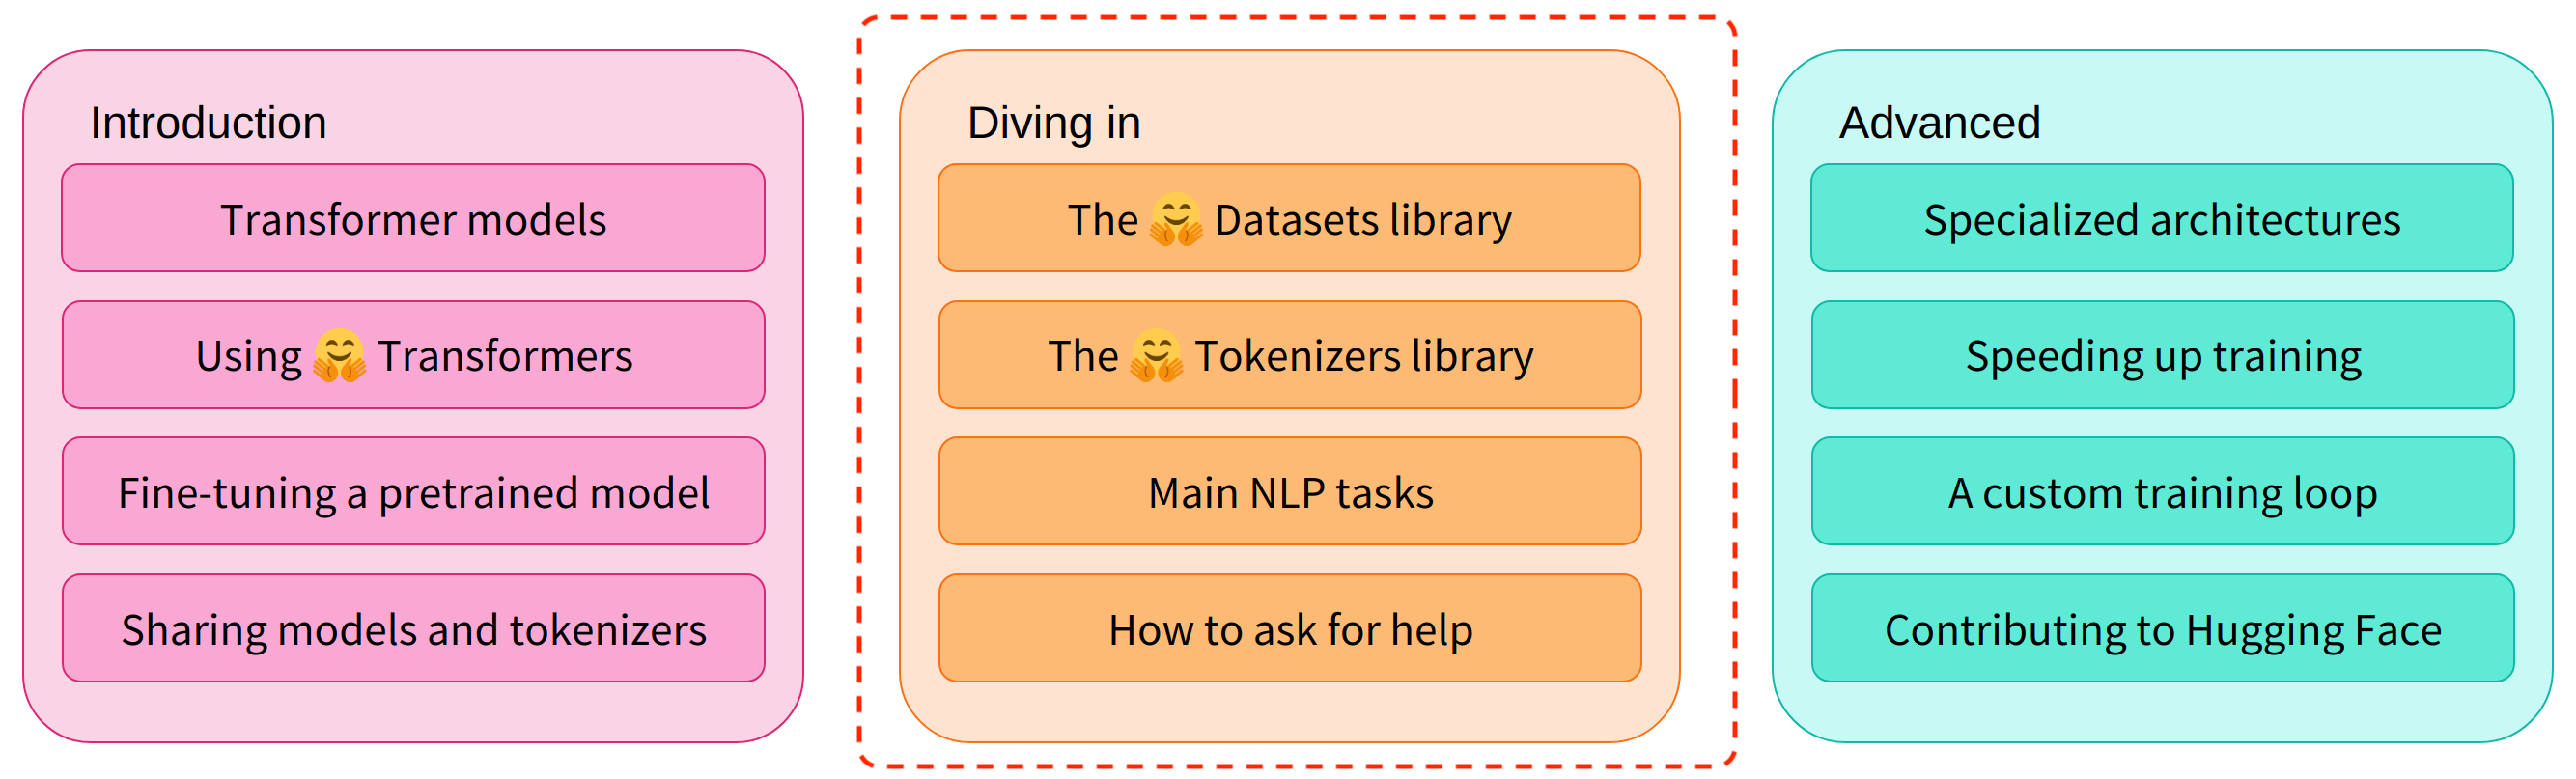
    
    A primeira ensinará o básico de como usar um modelo Transformer, ajustá-lo em seu próprio conjunto de
    dados e compartilhar o resultado com a comunidade. A segunda mergulhará mais fundo em nossas bibliotecas
    e ensinará como lidar com qualquer tarefa de NLP.

# Neural Language Processing (NLP):

    Antes de nos aprofundarmos nos modelos Transformer, vamos fazer uma rápida
    visão geral do que é o processamento de linguagem natural (PLN) e porque nos
    importamos com isso.

O que é um NLP?

    NLP é um campo da linguística e aprendizado de máquina focado em compreender tudo
    relacionado à linguagem humana. O objetivo das tarefas de NLP não é apenas entender
    palavras isoladamente, mas ser capaz de compreender o contexto dessas palavras.

Alguns Exemplos:

    1. Classificar frases inteiras: Obter o sentimento de uma análise,
    detectar se um e-mail é spam, determinar se uma sentença está gramaticalmente
    correta ou se duas sentenças estão logicamente relacionadas ou não.
    
    2. Classificar cada palavra em uma sentença: Identificar os componentes gramaticais
    de uma sentença (substantivo, verbo, adjetivo) ou as entidades nomeadas (pessoa, local,
    organização).
    
    3. Gerar conteúdo de texto: Completar uma sugestão com texto gerado automaticamente,
    preencher lacunas em um texto com palavras mascaradas.
    
    4. Extrair uma resposta de um texto: Dada uma pergunta e um contexto, extrair a resposta
    com base nas informações fornecidas no contexto. Gerar uma nova sentença a partir de um
    texto de entrada: Traduzir um texto para outro idioma, resumir um texto. No entanto, o
    PLN não se limita ao texto escrito. Ele também aborda desafios complexos em reconhecimento
    de fala e visão computacional, como gerar uma transcrição de uma amostra de áudio ou uma
    descrição de uma imagem.

Por que é desafiador?
    
    Computadores não processam informações da mesma forma que os humanos. Para modelos de
    aprendizado de máquina (ML), tais tarefas são mais difíceis. O texto precisa ser processado
    de uma maneira que permita ao modelo aprender com ele. E como a linguagem é complexa, precisamos
    pensar cuidadosamente sobre como esse processamento deve ser feito. Muita pesquisa foi realizada
    sobre como representar texto, e veremos alguns métodos no próximo capítulo.  

# Transformers, e o que podem fazer?
Model Hub: https://huggingface.co/models

    Nessa seção o curso começa a abordar algumas implementações de sua
    biblioteca de código aberto. A partir daqui a coisa começa a ficar
    um pouco mais prática.

In [1]:
# importando método:
from transformers import pipeline

    O método pipeline da biblioteca transformer é um método interessante, ele
    pega determinado processo de NLP do inicio ao fim. Podemos resumir um processo
    de predição em:

    pré-processamento -> Modelo -> pos-processamento

    O método pipeline simplemente passa por todas as etapas de inicio ao fim e te
    da a respectiva resposta final. É o método pipeline é a API mais alto nivel*
    da biblioteca transformers.

Nota:

    *Mais alto nivel na computação, significa algo mais proximo da nossa linguagem
    e mais longe da linguagem de máquina, ou seja, no contexto da colocação, de certo
    modo, é dizer que é a API mais básica da biblioteca.

documentação: https://huggingface.co/docs/transformers/main_classes/pipelines

## Análise de Sentimento:

    Analise de sentimento é um das principais tarefas quando o assunto
    é NLPs, envolvendo a identificação e avaliação das emoções expressas
    em textos. Na era das Inteligências Artificiais e do Marketing Digital,
    não precisa de muito pra justificar a importancia desse tipo de aplicação.
Nota:

    O nome real da task (tarefa) que o pipeline executa é "text-classification",
    "sentiment-analysis" é um alias, um apelido dado à tarefa.

https://huggingface.co/docs/transformers/v4.37.2/en/main_classes/pipelines#transformers.TextClassificationPipeline

In [2]:
# Instanciando objeto:
classifier = pipeline("sentiment-analysis") # text-classification

# Classificando Frase:
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

    Poderiamos querer analisar mais de uma entrada também, e a
    API nos permite essa possibilidade.

In [3]:
# Multiplas frases:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.",
     "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

**Analise de Sentimento em PT-BR:**

    O pipeline utiliza, por padrão, um modelo pré-treinado
    para lidar com a lingua inglesa, porém, podemos tentar
    utilizar isso para analise de sentimento em portugues.

In [4]:
# Modelo utilizado:
classifier.model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [5]:
# Teste em PT-BR:
classifier(
    ["O ecossistema da Hugging Face é realmente interessante.",
     "Programar se torna mais agradável quando você estabele propositos claros.",
     "Odeio o fato de te amar."]
)

[{'label': 'NEGATIVE', 'score': 0.5610359311103821},
 {'label': 'NEGATIVE', 'score': 0.9766438603401184},
 {'label': 'NEGATIVE', 'score': 0.6941173672676086}]

In [6]:
# Comparação em inglês:
classifier(
    ["The Hugging Face ecosystem is truly fascinating.",
     "Programming becomes more enjoyable when you set clear goals.",
     "I hate the fact that I love you."]
)

[{'label': 'POSITIVE', 'score': 0.9998024106025696},
 {'label': 'POSITIVE', 'score': 0.9996482133865356},
 {'label': 'NEGATIVE', 'score': 0.9849146604537964}]

**Conclusão**

    Pode ser que tenha alguém que use dessa forma crua, para mim,
    precisa de um ajuste para se obter resultados melhores.

**Etapas do Processo**

    Como já dito, computador não entende letra, ou seja, podemos
    resumir o processo de se trabalhar com textos em 3 etapas.

    1. Pré-processamento do texto para um formato compreensível pelo modelo,
    ou seja, codificar os caracteres de modo que o modelo entenda, que nada
    mais é do que tranformar em numeros.

    2. Os inputs pré-processados são enviados para o modelo, a ideia é que
    o modelo possa computar essa informação, ou seja, fazer os calculos
    necessários para gerar nossa predição.

    3. As previsões do modelo são pós-processadas, para que você possa
    compreendê-las, ou seja, transformadas de numero em algo compreensivel
    à lingua humana.

    A API (ou método) pipeline perpassa por essas 3 etapas, de fato, é o
    método mais abrangente da biblioteca.

## Zero-Shot Classification:

    O zero-shot classification é um método de classificação não paramétrico ma
    qual precisamos classificar textos que não foram rotulados, deste modo,
    permitindo que você especifique quais rótulos usar para a classificação.
    Assim, você não precisa depender dos rótulos do modelo pré-treinado,
    diferente do método anterior que era paramétrico, com os labels já definidos.

    Essa é uma situação comum em projetos do mundo real, pois rotular texto
    geralmente consome tempo e requer especialização no domínio, então é um
    conhecimento bem útil de se ter.

https://huggingface.co/docs/transformers/v4.37.2/en/main_classes/pipelines#transformers.ZeroShotClassificationPipeline

In [7]:
# Instanciando objeto:
classifier_zs = pipeline("zero-shot-classification")

# Classificando:
classifier_zs(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445989489555359, 0.11197412759065628, 0.04342695698142052]}

In [8]:
# Checando modelo:
classifier_zs.model

BartForSequenceClassification(
  (model): BartModel(
    (shared): Embedding(50265, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): Layer

**Conclusão**

    Note que ouve uma mudança de modelo para esse caso, em relação
    com o caso anterior. O que é de se esperar né, são problemas
    modelados de formas diferentes. Nenhum mistério quanto a isso.

    O que é interessante dizer é que este pipeline é chamado de
    "zero-shot" porque você não precisa ajustar o modelo aos seus
    dados para usá-lo. Ele pode fornecer diretamente pontuações de
    probabilidade para qualquer lista de rótulos que você desejar!!

## Gerador de Texto:

    A ideia principal aqui é que o modelo irá auto-completá-lo uma frase fornecido no
    prompt, gerando o restante do texto. Isso é semelhante à função de texto preditivo
    encontrada em muitos telefones. De certo modo, é isso que o ChatGPT faz, só que de
    uma forma bem mais refinada.

Nota:

    A geração de texto envolve aleatoriedade, então é normal que se obtenha resultados
    diferentes a cada vez que se rodar o modelo. Aqui temos um caso de modelo genrativo,
    o que iremos explicitar mais a frente.

https://huggingface.co/docs/transformers/v4.37.2/en/main_classes/pipelines#transformers.TextGenerationPipeline

In [9]:
# Instanciando Objeto:
generator = pipeline("text-generation")

# Rodando modelo:
response = generator("The Hugging Face ecosystem is")

# Resposta:
response[0]['generated_text']

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'The Hugging Face ecosystem is designed to help protect your face! It is not meant to make you cringe or to get in trouble over it. I personally consider it the ideal application for removing any unwanted facial hair.\n\nIf your facial hair is'

    Note que aqui não estamos falando na qualidade da resposta, isso ai
    já é um tema ainda mais complexo. Estamos apenas falando de geração
    de textos que sejam entendiveis para nós.

In [10]:
# Checando Modelo:
generator.model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

**Nota - Generative Pre-trained Transformer**


    Note que estamos usando um GPT! GPT não é um Chat, GPT ("Generative Pre-trained Transformer")
    é uma classe de modelos de linguagem baseados em transformer desenvolvida pela OpenAI. Os modelos
    GPT são projetados para tarefas de processamento de linguagem natural e têm alcançado resultados
    significativos em uma variedade de aplicações. O ChatGPT é construido sobre um Generative
    Pre-traind Transformer.

**Model Hub** https://huggingface.co/models

    Poderiamos também pensar em utilizar outro modelo para essa tarefa. É nesse momento que o curso
    de NLP do Hugging Face nos apresenta ao seu hall de modelos. O ecossistema da Hugging Face é realmente
    muito amplo, tem várias opções divididas pelos tipos de tarefas que elas trabalham.

    Nesse ponto é fundamental saber a teoria por trás das aplicações, as abordagens matemáticas vão lhe dizer
    qual modelo escolher. Por mais que o Hugging Face te dê suas opções dividas em áreas de aplicação, sem os
    conhecimentos adequados, fica dificil escolher qual é o melhor modelo que se adeque ao problema.

    Seguindo o tutorial, vou manter o modelo utilizado, o distilgpt2, como um outro modelo para a geração
    de texto. Note que é outro modelo, mas ainda é da linha do gpt. Isso é uma coisa interessante de pontuar,
    o leigo, que não entende a teoria, não consegue nem identificar que o gpt é uma tecnica não um modelo.
    
distilgpt2: https://huggingface.co/distilbert/distilgpt2?text=My+name+is+Clara+and+I+am

In [11]:
# Instanciando modelo:
generator_newML = pipeline("text-generation", model="distilgpt2")

# Gerando texto:
resposta = generator_newML("In this course, we will teach you how to",
                           max_length=30,num_return_sequences=2) # Note que aqui definimos duas respostas:

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [12]:
# Respostas:
print(f"Primeira Resposta:\n{resposta[0]['generated_text']}")
print(f"Segunda Resposta:\n{resposta[1]['generated_text']}")

Primeira Resposta:
In this course, we will teach you how to set up a Linux-based version so that you can set up all your free and open source software
Segunda Resposta:
In this course, we will teach you how to do it. It is often difficult to become proficient in some things, and we will also provide you


    Note que não é a melhor ainda não é um ChatGPT, mas já é
    alguma geração de texto. Vamos ver até onde isso vai dar.

Nota:

    Você pode refinar sua busca por um modelo clicando nas tags de idioma
    e escolher um modelo que irá gerar texto em outro idioma. O Model Hub
    contém até pontos de verificação para modelos multilíngues que suportam
    vários idiomas.

    Depois de selecionar um modelo clicando nele, você verá que existe um
    widget que permite experimentá-lo diretamente online. Dessa forma, você
    pode testar rapidamente os recursos do modelo antes de baixá-lo.

## Named entity recognition:

    Eeconhecimento de entidade nomeada (NER) é uma tarefa em que o
    modelo precisa descobrir quais partes do texto de entrada
    correspondem a entidades como pessoas, locais ou organizações.

In [20]:
ner = pipeline("ner", grouped_entities=True)
resposta = ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [22]:
resposta

[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

In [24]:
ner.model

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), 

## Mask filling:

    Fomos apresentados ao Gerador de Texto, agora vamos apresentar um jeito
    de avaliar a qualidade do modelo. A ideia do fill-mask tarefa é preencher
    as lacunas de um determinado texto. Isso é muito utillizado para checar
    se as predições que o modelo está fazendo, faz sentido.

https://huggingface.co/docs/transformers/v4.37.2/en/main_classes/pipelines#transformers.FillMaskPipeline

In [13]:
# Instanciando Modelo:
unmasker = pipeline("fill-mask")

# Calculando possibilidades de preenchimento:
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'score': 0.19619806110858917,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.04052723944187164,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

In [21]:
unmasker.model

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): La

Notas

    Essa técnica é baseada em calculo de distância, geralmente distância
    euclidiana. O algoritmo mais comum para esse caso é o KNN neighbors,
    por isso do parâmetro "top_k" que nada mais é do que o hiperparâmetro
    que vai definir a quantidade de vizinhos próximos a serem analisados.

    O score aqui é uma pontuação, não sei se temos todos os elementos de
    uma medida de probabilidade para defini-lo de forma matematicamente
    precisa como uma medida de probabilidade, mas é como se fosse.

    Observe que aqui o modelo preenche a palavra especial <mask>, que
    geralmente é chamada de token de máscara. Outros modelos de preenchimento
    de máscara podem ter tokens de máscara diferentes, por isso é sempre bom
    verificar a palavra de máscara adequada ao explorar outros modelos. Uma
    maneira de verificar isso é observar a palavra da máscara usada no widget.

**Testando outro modelo**

    Poderiamos pensar em usar outro modelo para esse processo. O curso
    indica uma tentativa utilizando o "bert-base-cased", então vamos testar.

bert-base-cased: https://huggingface.co/google-bert/bert-base-cased

In [14]:
# Instanciando Modelo:
unmasker_bbc = pipeline('fill-mask', model='bert-base-cased')

# Calculando possibilidades de preenchimento:
unmasker_bbc("This course will teach you all about [MASK] models.")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

[{'score': 0.25963184237480164,
  'token': 1648,
  'token_str': 'role',
  'sequence': 'This course will teach you all about role models.'},
 {'score': 0.09427252411842346,
  'token': 1103,
  'token_str': 'the',
  'sequence': 'This course will teach you all about the models.'},
 {'score': 0.03386765345931053,
  'token': 4633,
  'token_str': 'fashion',
  'sequence': 'This course will teach you all about fashion models.'},
 {'score': 0.025944063439965248,
  'token': 1297,
  'token_str': 'life',
  'sequence': 'This course will teach you all about life models.'},
 {'score': 0.02306208200752735,
  'token': 1292,
  'token_str': 'these',
  'sequence': 'This course will teach you all about these models.'}]

**Conclusão**

    Me parece que o que o modelo default é o mais interessante até.

**Nota**

    Note a escrita do termo que indica o mascaramento muda de um modelo para
    o outro. No primeiro era <mask>, já no segundo temos [MASK].

## Question answering:

    O Question answering responde a perguntas usando informações de um
    determinado contexto. Note que aqui é a primeira vez que introduzimos
    a ideia de contexto. Isso é interessante.

In [18]:
# Instanciando Modelo:
question_answerer = pipeline("question-answering")

# Executando Pergunta:
resposta = question_answerer(question="Where do I work?", context="My name is Sylvain and I work at Hugging Face in Brooklyn")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [19]:
# Resposta:
resposta

{'score': 0.6949767470359802, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

    Observe que esse pipeline funciona extraindo informações do contexto fornecido; não gera a resposta.

## Summarization:

    A sumarização é a tarefa de reduzir um texto a um texto mais curto,
    mantendo todos (ou a maioria) dos aspectos importantes referenciados
    no texto.

    Isso pode ser uma coisa boa a principio, mas um dos tipos de tarefas
    que eu faço muito no ChatGPT e sumarizar conteudos, um código que faça
    isso é algo interessante.

In [25]:
# Instanciando Modelo:
summarizer = pipeline("summarization")

# Sumarizando:
resposta = summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

In [36]:
# Resposta sumarização:
summarization = resposta[0]['summary_text'];display(summarization)

' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'

    Assim como na geração de texto, você pode especificar
    max_length ou min_length para o resultado.

In [32]:
summarizer.model

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerN

**Traduzindo e sumarizando texto**

    Podemos pegar a sumarização e traduzir essa frase, e aqui vamos
    contruir essa ideia, é um exercicio interessante e útil.

In [45]:
# Dependencias necessárias:
from transformers import T5ForConditionalGeneration, T5Tokenizer, T5Model

In [34]:
# Instanciando Objetos:
tokenizer = T5Tokenizer.from_pretrained("t5-base")
model = T5Model.from_pretrained("t5-base")

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

## Analisando as funcionalidades do Pipeline:

    Esses métodos assim, é sempre interessante dar uma olhada
    na sua estrutura para entender suas possibilidades. Eu,
    particularmente, gosto de fazer isso de duas maneiras.

https://docs.python.org/pt-br/3/library/functions.html

**Função help**

    O legal da função help é que ela dá uma visão bem ampla,
    e te ajuda a contextualizar melhor o que você está pesquisando.

In [15]:
# Poderiamos analisar o pipeline mais a fundo:
help(pipeline)

Help on function pipeline in module transformers.pipelines:

pipeline(task: str = None, model: Union[str, ForwardRef('PreTrainedModel'), ForwardRef('TFPreTrainedModel'), NoneType] = None, config: Union[str, transformers.configuration_utils.PretrainedConfig, NoneType] = None, tokenizer: Union[str, transformers.tokenization_utils.PreTrainedTokenizer, ForwardRef('PreTrainedTokenizerFast'), NoneType] = None, feature_extractor: Union[str, ForwardRef('SequenceFeatureExtractor'), NoneType] = None, image_processor: Union[str, transformers.image_processing_utils.BaseImageProcessor, NoneType] = None, framework: Optional[str] = None, revision: Optional[str] = None, use_fast: bool = True, token: Union[str, bool, NoneType] = None, device: Union[int, str, ForwardRef('torch.device'), NoneType] = None, device_map=None, torch_dtype=None, trust_remote_code: Optional[bool] = None, model_kwargs: Dict[str, Any] = None, pipeline_class: Optional[Any] = None, **kwargs) -> transformers.pipelines.base.Pipeline


    Por exemplo, vemos que o método pipeline tem várias "task", tarefas,
    ou seja, sentiment-analysis é só uma das possibilidades que se pode
    utilizar. Há a possibilidade de acoplar modelos ao método pipeline,
    enfim, dá pra fazer muita coisa, isso aqui é só um arranhão na superficie.

**Função dir**

    Uma outra opção que gosto de usar também é a função dir, que te
    retorna uma lista com todos os elementos que compões o objeto
    que você analisando.

In [16]:
lista_elementos = [elemento for elemento in dir(classifier) if "__" not in elemento] # Só para quetirar metodos mágica, você pode querer deixa-los.
display(lista_elementos)

['_abc_impl',
 '_batch_size',
 '_ensure_tensor_on_device',
 '_forward',
 '_forward_params',
 '_num_workers',
 '_postprocess_params',
 '_preprocess_params',
 '_sanitize_parameters',
 'binary_output',
 'call_count',
 'check_model_type',
 'default_input_names',
 'device',
 'device_placement',
 'ensure_tensor_on_device',
 'feature_extractor',
 'forward',
 'framework',
 'function_to_apply',
 'get_inference_context',
 'get_iterator',
 'image_processor',
 'iterate',
 'model',
 'modelcard',
 'postprocess',
 'predict',
 'preprocess',
 'return_all_scores',
 'run_multi',
 'run_single',
 'save_pretrained',
 'task',
 'tokenizer',
 'torch_dtype',
 'transform']